In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting import (
    plot_merchant_type_distribution,
    plot_transaction_amount_distribution,
    plot_event_distribution,
    plot_behavior_over_time,
    display_table_info
)

In [106]:
# Load data
account_state_log = pd.read_csv('Datasets/account_state_log.csv')
transactions_log = pd.read_csv('Datasets/transactions_log.csv', parse_dates=['timestamp'])
payments_log = pd.read_csv('Datasets/payments_log.csv', parse_dates=['timestamp'])
labels=pd.read_csv('Datasets/labels.csv')

In [107]:
account_state_log

,agent_id,credit_balance,credit_utilization,interest_rate,min_payment_factor,current_missed_payments,timestamp
0,839,367.017294,0.367,0.191914,0.05,0,2023-01-01
1,179,638.371473,0.638,0.191758,0.05,0,2023-01-01
2,645,652.219191,0.326,0.235719,0.05,0,2023-01-01
3,170,777.674485,0.078,0.234455,0.05,0,2023-01-01
4,152,634.101608,0.317,0.247455,0.05,0,2023-01-01
...,...,...,...,...,...,...,...
373220,16481,2948.692830,0.983,0.196236,0.05,0,2023-04-01
373221,10703,653.288549,0.131,0.232751,0.05,0,2023-04-01
373222,13290,4700.421460,0.470,0.220961,0.05,0,2023-04-01
373223,17809,1055.419737,0.211,0.238539,0.05,0,2023-04-01


In [108]:
len(account_state_log['agent_id'].unique())

7352

In [109]:
aggregated = account_state_log.groupby('agent_id').agg({
    'credit_balance': ['mean', 'max', 'last'],  # Average, peak, and final balance
    'credit_utilization': ['mean', 'max', 'last'],  # Utilization stats
    'interest_rate': ['mean', 'last'],  # Average and final interest rate
    'current_missed_payments': ['sum', 'max', 'last'],  # Total, peak, and latest missed payments
    'timestamp': ['min', 'max']  # First and last timestamps
})

# Flatten MultiIndex columns for easier use
aggregated.columns = ['_'.join(col).strip() for col in aggregated.columns]
aggregated.reset_index(inplace=True)

In [110]:
aggregated

,agent_id,credit_balance_mean,credit_balance_max,credit_balance_last,credit_utilization_mean,credit_utilization_max,credit_utilization_last,interest_rate_mean,interest_rate_last,current_missed_payments_sum,current_missed_payments_max,current_missed_payments_last,timestamp_min,timestamp_max
0,0,3054.533833,4964.111415,2505.991415,0.623747,0.993,0.501,0.209866,0.209866,0,0,0,2023-01-01,2023-04-01
1,3,1826.206224,1990.626004,1990.626004,0.927758,0.995,0.995,0.211185,0.211185,0,0,0,2023-01-01,2023-04-01
2,6,649.106037,1279.993400,321.083400,0.227275,0.439,0.107,0.186929,0.187204,0,0,0,2023-01-01,2023-04-01
3,7,1621.523367,1984.664026,1941.344026,0.850923,0.998,0.971,0.216252,0.216252,0,0,0,2023-01-01,2023-04-01
4,8,5748.472329,9973.203428,7835.223428,0.584846,0.997,0.784,0.219701,0.219975,1,1,0,2023-01-01,2023-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,18185,691.140065,691.140065,691.140065,0.346000,0.346,0.346,0.153258,0.153258,0,0,0,2023-04-01,2023-04-01
7348,18186,1167.109351,1167.109351,1167.109351,0.389000,0.389,0.389,0.206696,0.206696,0,0,0,2023-04-01,2023-04-01
7349,18187,6.503746,6.503746,6.503746,0.145000,0.145,0.145,0.181687,0.181687,0,0,0,2023-04-01,2023-04-01
7350,18189,575.152999,575.152999,575.152999,0.288000,0.288,0.288,0.217025,0.217025,0,0,0,2023-04-01,2023-04-01


In [111]:
transactions_log

,agent_id,status,amount,merchant_category,merchant_id,online,timestamp
0,839,approved,8.64,Misc,EPJJ1K11,0,2023-01-01 02:13:35
1,179,approved,114.95,Misc,90GGX8J3,1,2023-01-01 01:38:41
2,645,approved,160.78,Retail,D33HTW5R,0,2023-01-01 07:29:55
3,170,approved,281.63,Business,FZR3PHV3,0,2023-01-01 05:46:06
4,152,approved,39.13,Clothing,4Z8KX9G4,0,2023-01-01 10:40:22
...,...,...,...,...,...,...,...
461699,10224,declined,39.13,Clothing,DBY4WEHR,1,2023-03-31 02:46:31
461700,13972,approved,97.62,Retail,D33HTW5R,1,2023-03-31 05:00:19
461701,484,approved,97.62,Retail,PI2C86AP,1,2023-03-31 03:59:00
461702,10350,approved,89.15,Transportation,U7FJ5ZPN,0,2023-03-31 05:54:04


In [112]:
len(transactions_log['agent_id'].unique())

7275

In [113]:
# Group by `agent_id` and aggregate
aggregated_transactions = transactions_log.groupby('agent_id').agg({
    'amount': ['sum', 'mean', 'max', 'count'],  # Transaction value stats
    'status': lambda x: (x == 'completed').sum(),  # Count of completed transactions
    'merchant_category': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most frequent category
    'merchant_id': pd.Series.nunique,  # Unique merchants
    'online': ['sum', 'mean'],  # Total and proportion of online transactions
    'timestamp': ['min', 'max']  # Transaction timeline
})

# Flatten MultiIndex columns
aggregated_transactions.columns = ['_'.join(col).strip() for col in aggregated_transactions.columns]
aggregated_transactions.reset_index(inplace=True)

# Rename for clarity
aggregated_transactions.rename(columns={
    'amount_sum': 'total_transaction_amount',
    'amount_mean': 'average_transaction_amount',
    'amount_max': 'max_transaction_amount',
    'amount_count': 'total_transactions',
    'status_<lambda>': 'completed_transactions',
    'merchant_id_nunique': 'unique_merchants',
    'online_sum': 'online_transactions',
    'online_mean': 'online_transaction_proportion',
    'timestamp_min': 'first_transaction_date',
    'timestamp_max': 'last_transaction_date'
}, inplace=True)

aggregated_transactions

,agent_id,total_transaction_amount,average_transaction_amount,max_transaction_amount,total_transactions,completed_transactions,merchant_category_<lambda>,unique_merchants,online_transactions,online_transaction_proportion,first_transaction_date,last_transaction_date
0,0,10812.48,124.281379,289.45,87,0,Misc,46,35,0.402299,2023-01-01 05:30:35,2023-03-31 08:16:57
1,3,47134.16,228.806602,591.81,206,0,Business,62,88,0.427184,2023-01-01 06:22:40,2023-03-31 04:20:35
2,6,2748.74,30.541556,107.45,90,0,Misc,31,47,0.522222,2023-01-01 05:30:59,2023-03-31 07:03:23
3,7,36366.21,227.288813,591.81,160,0,Misc,61,77,0.481250,2023-01-01 06:08:52,2023-03-31 08:46:48
4,8,27102.78,218.570806,591.81,124,0,Misc,52,55,0.443548,2023-01-01 04:41:12,2023-03-31 03:29:17
...,...,...,...,...,...,...,...,...,...,...,...,...
7270,18094,8.64,8.640000,8.64,1,0,Misc,1,1,1.000000,2023-03-31 03:30:38,2023-03-31 03:30:38
7271,18095,281.63,281.630000,281.63,1,0,Business,1,1,1.000000,2023-03-31 10:12:00,2023-03-31 10:12:00
7272,18097,281.63,281.630000,281.63,1,0,Business,1,0,0.000000,2023-03-31 03:16:59,2023-03-31 03:16:59
7273,18098,281.63,281.630000,281.63,1,0,Business,1,1,1.000000,2023-03-31 03:07:24,2023-03-31 03:07:24


In [114]:
transactions_log = pd.get_dummies(transactions_log, columns=['merchant_category'], prefix='', prefix_sep='')

# Now, perform your aggregation as before
unique_categories = ['Misc', 'Retail', 'Business', 'Clothing', 'Agricultural', 
                        'Contractor', 'Transportation', 'Utility', 'Professional']

# Group by `agent_id` and aggregate other columns
aggregated_transactions = transactions_log.groupby('agent_id').agg({
    'amount': ['sum', 'mean', 'max', 'count'],  # Transaction value stats
    'online': ['sum', 'mean'],  # Total and proportion of online transactions
    'timestamp': ['min', 'max'],  # Transaction timeline
}).reset_index()

# Aggregate the merchant category counts (sum the binary columns)
for category in unique_categories:
    aggregated_transactions[category] = transactions_log.groupby('agent_id')[category].sum().reset_index(drop=True)

# Flatten multi-level columns in the aggregated DataFrame
aggregated_transactions.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in aggregated_transactions.columns]

# Add custom metrics for `status` outside of the main aggregation
status_counts = transactions_log.groupby('agent_id')['status'].value_counts().unstack(fill_value=0).reset_index()
status_counts.rename(columns={'approved': 'approved_count', 'declined': 'declined_count'}, inplace=True)

# Merge the status counts back with the aggregated data
aggregated_transactions = pd.merge(aggregated_transactions, status_counts, on='agent_id', how='left')

# Drop the `merchant_id` column if it exists (optional, as per your requirement)
aggregated_transactions = aggregated_transactions.drop(columns=[col for col in aggregated_transactions.columns if 'merchant_id' in col], errors='ignore')

# Display the final aggregated transactions DataFrame
aggregated_transactions

,agent_id,amount_sum,amount_mean,amount_max,amount_count,online_sum,online_mean,timestamp_min,timestamp_max,Misc,Retail,Business,Clothing,Agricultural,Contractor,Transportation,Utility,Professional,approved_count,declined_count
0,0,10812.48,124.281379,289.45,87,35,0.402299,2023-01-01 05:30:35,2023-03-31 08:16:57,19,7,5,8,8,7,15,11,7,66,21
1,3,47134.16,228.806602,591.81,206,88,0.427184,2023-01-01 06:22:40,2023-03-31 04:20:35,52,27,53,12,20,5,11,10,16,23,183
2,6,2748.74,30.541556,107.45,90,47,0.522222,2023-01-01 05:30:59,2023-03-31 07:03:23,60,8,0,7,4,0,5,2,4,90,0
3,7,36366.21,227.288813,591.81,160,77,0.481250,2023-01-01 06:08:52,2023-03-31 08:46:48,41,17,36,14,16,10,8,10,8,48,112
4,8,27102.78,218.570806,591.81,124,55,0.443548,2023-01-01 04:41:12,2023-03-31 03:29:17,38,9,34,11,8,3,9,6,6,75,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,18094,8.64,8.640000,8.64,1,1,1.000000,2023-03-31 03:30:38,2023-03-31 03:30:38,1,0,0,0,0,0,0,0,0,1,0
7271,18095,281.63,281.630000,281.63,1,1,1.000000,2023-03-31 10:12:00,2023-03-31 10:12:00,0,0,1,0,0,0,0,0,0,1,0
7272,18097,281.63,281.630000,281.63,1,0,0.000000,2023-03-31 03:16:59,2023-03-31 03:16:59,0,0,1,0,0,0,0,0,0,1,0
7273,18098,281.63,281.630000,281.63,1,1,1.000000,2023-03-31 03:07:24,2023-03-31 03:07:24,0,0,1,0,0,0,0,0,0,1,0


In [115]:
payments_log

,agent_id,amount,timestamp
0,881,322.69,2023-01-01 05:28:17
1,331,483.74,2023-01-01 08:16:48
2,390,292.20,2023-01-01 04:08:06
3,939,337.62,2023-01-01 06:48:56
4,120,614.31,2023-01-01 04:33:32
...,...,...,...
20386,15603,521.89,2023-03-31 07:04:09
20387,16960,1232.65,2023-03-31 03:54:48
20388,16526,413.18,2023-03-31 02:30:08
20389,13809,1170.80,2023-03-31 09:08:47


In [116]:
# Group by `agent_id` and aggregate
aggregated_payments = payments_log.groupby('agent_id').agg({
    'amount': ['sum', 'mean', 'max', 'min', 'count', 'last'],  # Payment stats
    'timestamp': ['min', 'max']  # Payment timeline
})

# Flatten MultiIndex columns
aggregated_payments.columns = ['_'.join(col).strip() for col in aggregated_payments.columns]
aggregated_payments.reset_index(inplace=True)

# Add derived features (e.g., payment frequency, time difference)
aggregated_payments['payment_frequency'] = aggregated_payments['amount_count'] / (
    (aggregated_payments['timestamp_max'] - aggregated_payments['timestamp_min']).dt.days + 1
)  # Payments per day
aggregated_payments['time_between_first_last'] = (
    aggregated_payments['timestamp_max'] - aggregated_payments['timestamp_min']
).dt.days

In [117]:
aggregated_payments

,agent_id,amount_sum,amount_mean,amount_max,amount_min,amount_count,amount_last,timestamp_min,timestamp_max,payment_frequency,time_between_first_last
0,0,5878.93,2939.465000,2953.11,2925.82,2,2953.11,2023-02-20 09:05:01,2023-03-27 06:20:56,0.057143,34
1,3,2670.97,890.323333,925.06,848.27,3,925.06,2023-01-16 06:47:01,2023-03-02 03:30:47,0.066667,44
2,6,2965.40,370.675000,612.19,227.14,8,264.32,2023-01-19 04:47:47,2023-03-30 06:09:23,0.112676,70
3,7,7318.15,1045.450000,1187.64,427.18,7,1187.64,2023-01-01 05:17:21,2023-03-16 03:10:22,0.094595,73
4,8,9163.48,4581.740000,5932.98,3230.50,2,3230.50,2023-03-05 05:23:19,2023-03-11 02:49:04,0.333333,5
...,...,...,...,...,...,...,...,...,...,...,...
5718,18045,566.98,566.980000,566.98,566.98,1,566.98,2023-03-31 03:21:25,2023-03-31 03:21:25,1.000000,0
5719,18054,740.36,740.360000,740.36,740.36,1,740.36,2023-03-31 04:24:45,2023-03-31 04:24:45,1.000000,0
5720,18060,376.65,376.650000,376.65,376.65,1,376.65,2023-03-31 05:59:52,2023-03-31 05:59:52,1.000000,0
5721,18072,352.49,352.490000,352.49,352.49,1,352.49,2023-03-31 03:17:50,2023-03-31 03:17:50,1.000000,0


In [118]:
labels.describe()

,agent_id,charge_off_within_3_months,charge_off_within_6_months,charge_off_within_9_months,charge_off_within_12_months
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,12658.073177,0.001632,0.009385,0.018362,0.027476
std,4744.594481,0.040370,0.096428,0.134267,0.163476
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11312.750000,0.000000,0.000000,0.000000,0.000000
50%,13616.500000,0.000000,0.000000,0.000000,0.000000
75%,15884.500000,0.000000,0.000000,0.000000,0.000000
max,18190.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
merged_df = labels.merge(aggregated, on='agent_id', how='left')

In [120]:
# Convert timestamp columns to datetime
merged_df['timestamp_min'] = pd.to_datetime(merged_df['timestamp_min'])
merged_df['timestamp_max'] = pd.to_datetime(merged_df['timestamp_max'])

# Calculate the difference in days
merged_df['timestamp_diff'] = (merged_df['timestamp_max'] - merged_df['timestamp_min']).dt.days

# Drop the original timestamp columns
merged_df.drop(columns=['timestamp_min', 'timestamp_max'], inplace=True)

# Display the updated DataFrame
merged_df.head()

,agent_id,charge_off_within_3_months,charge_off_within_6_months,charge_off_within_9_months,charge_off_within_12_months,credit_balance_mean,credit_balance_max,credit_balance_last,credit_utilization_mean,credit_utilization_max,credit_utilization_last,interest_rate_mean,interest_rate_last,current_missed_payments_sum,current_missed_payments_max,current_missed_payments_last,timestamp_diff
0,0,0,0,0,0,3054.533833,4964.111415,2505.991415,0.623747,0.993,0.501,0.209866,0.209866,0,0,0,90
1,3,0,0,0,0,1826.206224,1990.626004,1990.626004,0.927758,0.995,0.995,0.211185,0.211185,0,0,0,90
2,6,0,0,0,0,649.106037,1279.993400,321.083400,0.227275,0.439,0.107,0.186929,0.187204,0,0,0,90
3,7,0,0,0,0,1621.523367,1984.664026,1941.344026,0.850923,0.998,0.971,0.216252,0.216252,0,0,0,90
4,8,0,0,0,0,5748.472329,9973.203428,7835.223428,0.584846,0.997,0.784,0.219701,0.219975,1,1,0,90


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Prepare features and targets
X = merged_df.drop(columns=['agent_id', 'charge_off_within_3_months', 'charge_off_within_6_months', 
                             'charge_off_within_9_months', 'charge_off_within_12_months'])
y = merged_df[['charge_off_within_3_months', 'charge_off_within_6_months', 
               'charge_off_within_9_months', 'charge_off_within_12_months']]

# Initialize a dictionary to store results for each target
results = {}

# Iterate over each target variable
for target in y.columns:
    print(f"Training model for target: {target}")
    
    # Split data for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=42)
    
    # Convert to DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Define parameters for binary classification
    params = {
        'objective': 'binary:logistic',  # Binary classification
        'max_depth': 6,
        'eta': 0.3,
        'eval_metric': 'logloss'
    }
    
    # Train the model
    num_rounds = 100
    bst = xgb.train(params, dtrain, num_rounds)
    
    # Make predictions
    preds = bst.predict(dtest)
    preds_binary = [1 if pred > 0.5 else 0 for pred in preds]  # Convert probabilities to binary predictions
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, preds_binary)
    precision = precision_score(y_test, preds_binary, zero_division=0)
    recall = recall_score(y_test, preds_binary, zero_division=0)
    f1 = f1_score(y_test, preds_binary, zero_division=0)
    cm = confusion_matrix(y_test, preds_binary)
    report = classification_report(y_test, preds_binary, zero_division=0)
    
    # Print metrics
    print(f"Accuracy for {target}: {accuracy:.4f}")
    print(f"Precision for {target}: {precision:.4f}")
    print(f"Recall for {target}: {recall:.4f}")
    print(f"F1-score for {target}: {f1:.4f}")
    print(f"Confusion Matrix for {target}:\n{cm}")
    print(f"Classification Report for {target}:\n{report}")
    
    # Save results and model
    results[target] = {
        'model': bst,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': report
    }
    bst.save_model(f"xgboost_model_{target}.json")

# Summary of results
for target, result in results.items():
    print(f"Model for {target}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-score: {result['f1_score']:.4f}")


Training model for target: charge_off_within_3_months
Accuracy for charge_off_within_3_months: 0.9993
Precision for charge_off_within_3_months: 0.0000
Recall for charge_off_within_3_months: 0.0000
F1-score for charge_off_within_3_months: 0.0000
Confusion Matrix for charge_off_within_3_months:
[[1470    0]
 [   1    0]]
Classification Report for charge_off_within_3_months:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1470
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1471
   macro avg       0.50      0.50      0.50      1471
weighted avg       1.00      1.00      1.00      1471

Training model for target: charge_off_within_6_months
Accuracy for charge_off_within_6_months: 0.9925
Precision for charge_off_within_6_months: 0.0000
Recall for charge_off_within_6_months: 0.0000
F1-score for charge_off_within_6_months: 0.0000
Confusion Matrix for charge_off_within_6_months:
[[14

In [122]:
merged_df2 = merged_df.merge(aggregated_payments, on='agent_id', how='left')

In [123]:
merged_df2.isna().sum()

agent_id                           0
charge_off_within_3_months         0
charge_off_within_6_months         0
charge_off_within_9_months         0
charge_off_within_12_months        0
credit_balance_mean                0
credit_balance_max                 0
credit_balance_last                0
credit_utilization_mean            0
credit_utilization_max             0
credit_utilization_last            0
interest_rate_mean                 0
interest_rate_last                 0
current_missed_payments_sum        0
current_missed_payments_max        0
current_missed_payments_last       0
timestamp_diff                     0
amount_sum                      1629
amount_mean                     1629
amount_max                      1629
amount_min                      1629
amount_count                    1629
amount_last                     1629
timestamp_min                   1629
timestamp_max                   1629
payment_frequency               1629
time_between_first_last         1629
d

In [124]:
merged_df2['amount_sum'].fillna(0, inplace=True)
merged_df2['amount_mean'].fillna(0, inplace=True)
merged_df2['amount_max'].fillna(0, inplace=True)
merged_df2['amount_min'].fillna(0, inplace=True)
merged_df2['amount_count'].fillna(0, inplace=True)
merged_df2['amount_last'].fillna(0, inplace=True)
merged_df2['payment_frequency'].fillna(0, inplace=True)
merged_df2.drop(columns=['timestamp_min', 'timestamp_max','time_between_first_last'], inplace=True)


/var/folders/g3/nf_q_x0d0q3_12n_qrkr73m80000gn/T/ipykernel_94613/2776307123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df2['amount_sum'].fillna(0, inplace=True)
/var/folders/g3/nf_q_x0d0q3_12n_qrkr73m80000gn/T/ipykernel_94613/2776307123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [125]:
merged_df3 = merged_df2.merge(aggregated_transactions, on='agent_id', how='left')


In [126]:
merged_df3.isna().sum()

agent_id                         0
charge_off_within_3_months       0
charge_off_within_6_months       0
charge_off_within_9_months       0
charge_off_within_12_months      0
credit_balance_mean              0
credit_balance_max               0
credit_balance_last              0
credit_utilization_mean          0
credit_utilization_max           0
credit_utilization_last          0
interest_rate_mean               0
interest_rate_last               0
current_missed_payments_sum      0
current_missed_payments_max      0
current_missed_payments_last     0
timestamp_diff                   0
amount_sum_x                     0
amount_mean_x                    0
amount_max_x                     0
amount_min                       0
amount_count_x                   0
amount_last                      0
payment_frequency                0
amount_sum_y                    77
amount_mean_y                   77
amount_max_y                    77
amount_count_y                  77
online_sum          

In [129]:
merged_df3['amount_sum_y'].fillna(0, inplace=True)
merged_df3['amount_mean_y'].fillna(0, inplace=True)
merged_df3['amount_max_y'].fillna(0, inplace=True)
merged_df3['amount_count_y'].fillna(0, inplace=True)
merged_df3['online_sum'].fillna(0, inplace=True)
merged_df3['online_mean'].fillna('0', inplace=True)
merged_df3['Misc'].fillna(0, inplace=True)
merged_df3['Retail'].fillna(0, inplace=True)
merged_df3['Business'].fillna(0, inplace=True)
merged_df3['Clothing'].fillna(0, inplace=True)
merged_df3['Agricultural'].fillna(0, inplace=True)
merged_df3['Contractor'].fillna(0, inplace=True)
merged_df3['Transportation'].fillna(0, inplace=True)
merged_df3['Utility'].fillna(0, inplace=True)
merged_df3['Professional'].fillna(0, inplace=True)
merged_df3['approved_count'].fillna(0, inplace=True)
merged_df3['declined_count'].fillna(0, inplace=True)
merged_df3.drop(columns=['timestamp_min', 'timestamp_max'], inplace=True)


/var/folders/g3/nf_q_x0d0q3_12n_qrkr73m80000gn/T/ipykernel_94613/902087923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df3['amount_sum_y'].fillna(0, inplace=True)
/var/folders/g3/nf_q_x0d0q3_12n_qrkr73m80000gn/T/ipykernel_94613/902087923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [130]:
merged_final=merged_df3.copy()

In [136]:
merged_final['online_mean']=merged_final['online_mean'].astype('float64')

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Prepare features and targets
X = merged_final.drop(columns=['agent_id', 'charge_off_within_3_months', 'charge_off_within_6_months', 
                             'charge_off_within_9_months', 'charge_off_within_12_months'])
y = merged_final[['charge_off_within_3_months', 'charge_off_within_6_months', 
               'charge_off_within_9_months', 'charge_off_within_12_months']]

# Initialize a dictionary to store results for each target
results = {}

# Iterate over each target variable
for target in y.columns:
    print(f"Training model for target: {target}")
    
    # Split data for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=42)
    
    # Convert to DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Define parameters for binary classification
    params = {
        'objective': 'binary:logistic',  # Binary classification
        'max_depth': 6,
        'eta': 0.3,
        'eval_metric': 'logloss',
        'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),

    }
    
    # Train the model
    num_rounds = 100
    bst = xgb.train(params, dtrain, num_rounds)
    
    # Make predictions
    preds = bst.predict(dtest)
    preds_binary = [1 if pred > 0.5 else 0 for pred in preds]  # Convert probabilities to binary predictions
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, preds_binary)
    precision = precision_score(y_test, preds_binary, zero_division=0)
    recall = recall_score(y_test, preds_binary, zero_division=0)
    f1 = f1_score(y_test, preds_binary, zero_division=0)
    cm = confusion_matrix(y_test, preds_binary)
    report = classification_report(y_test, preds_binary, zero_division=0)
    
    # Print metrics
    print(f"Accuracy for {target}: {accuracy:.4f}")
    print(f"Precision for {target}: {precision:.4f}")
    print(f"Recall for {target}: {recall:.4f}")
    print(f"F1-score for {target}: {f1:.4f}")
    print(f"Confusion Matrix for {target}:\n{cm}")
    print(f"Classification Report for {target}:\n{report}")
    
    # Save results and model
    results[target] = {
        'model': bst,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': report
    }
    bst.save_model(f"xgboost_model_{target}.json")

# Summary of results
for target, result in results.items():
    print(f"Model for {target}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-score: {result['f1_score']:.4f}")


Training model for target: charge_off_within_3_months
Accuracy for charge_off_within_3_months: 0.9986
Precision for charge_off_within_3_months: 0.0000
Recall for charge_off_within_3_months: 0.0000
F1-score for charge_off_within_3_months: 0.0000
Confusion Matrix for charge_off_within_3_months:
[[1469    1]
 [   1    0]]
Classification Report for charge_off_within_3_months:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1470
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1471
   macro avg       0.50      0.50      0.50      1471
weighted avg       1.00      1.00      1.00      1471

Training model for target: charge_off_within_6_months
Accuracy for charge_off_within_6_months: 0.9918
Precision for charge_off_within_6_months: 0.0000
Recall for charge_off_within_6_months: 0.0000
F1-score for charge_off_within_6_months: 0.0000
Confusion Matrix for charge_off_within_6_months:
[[14

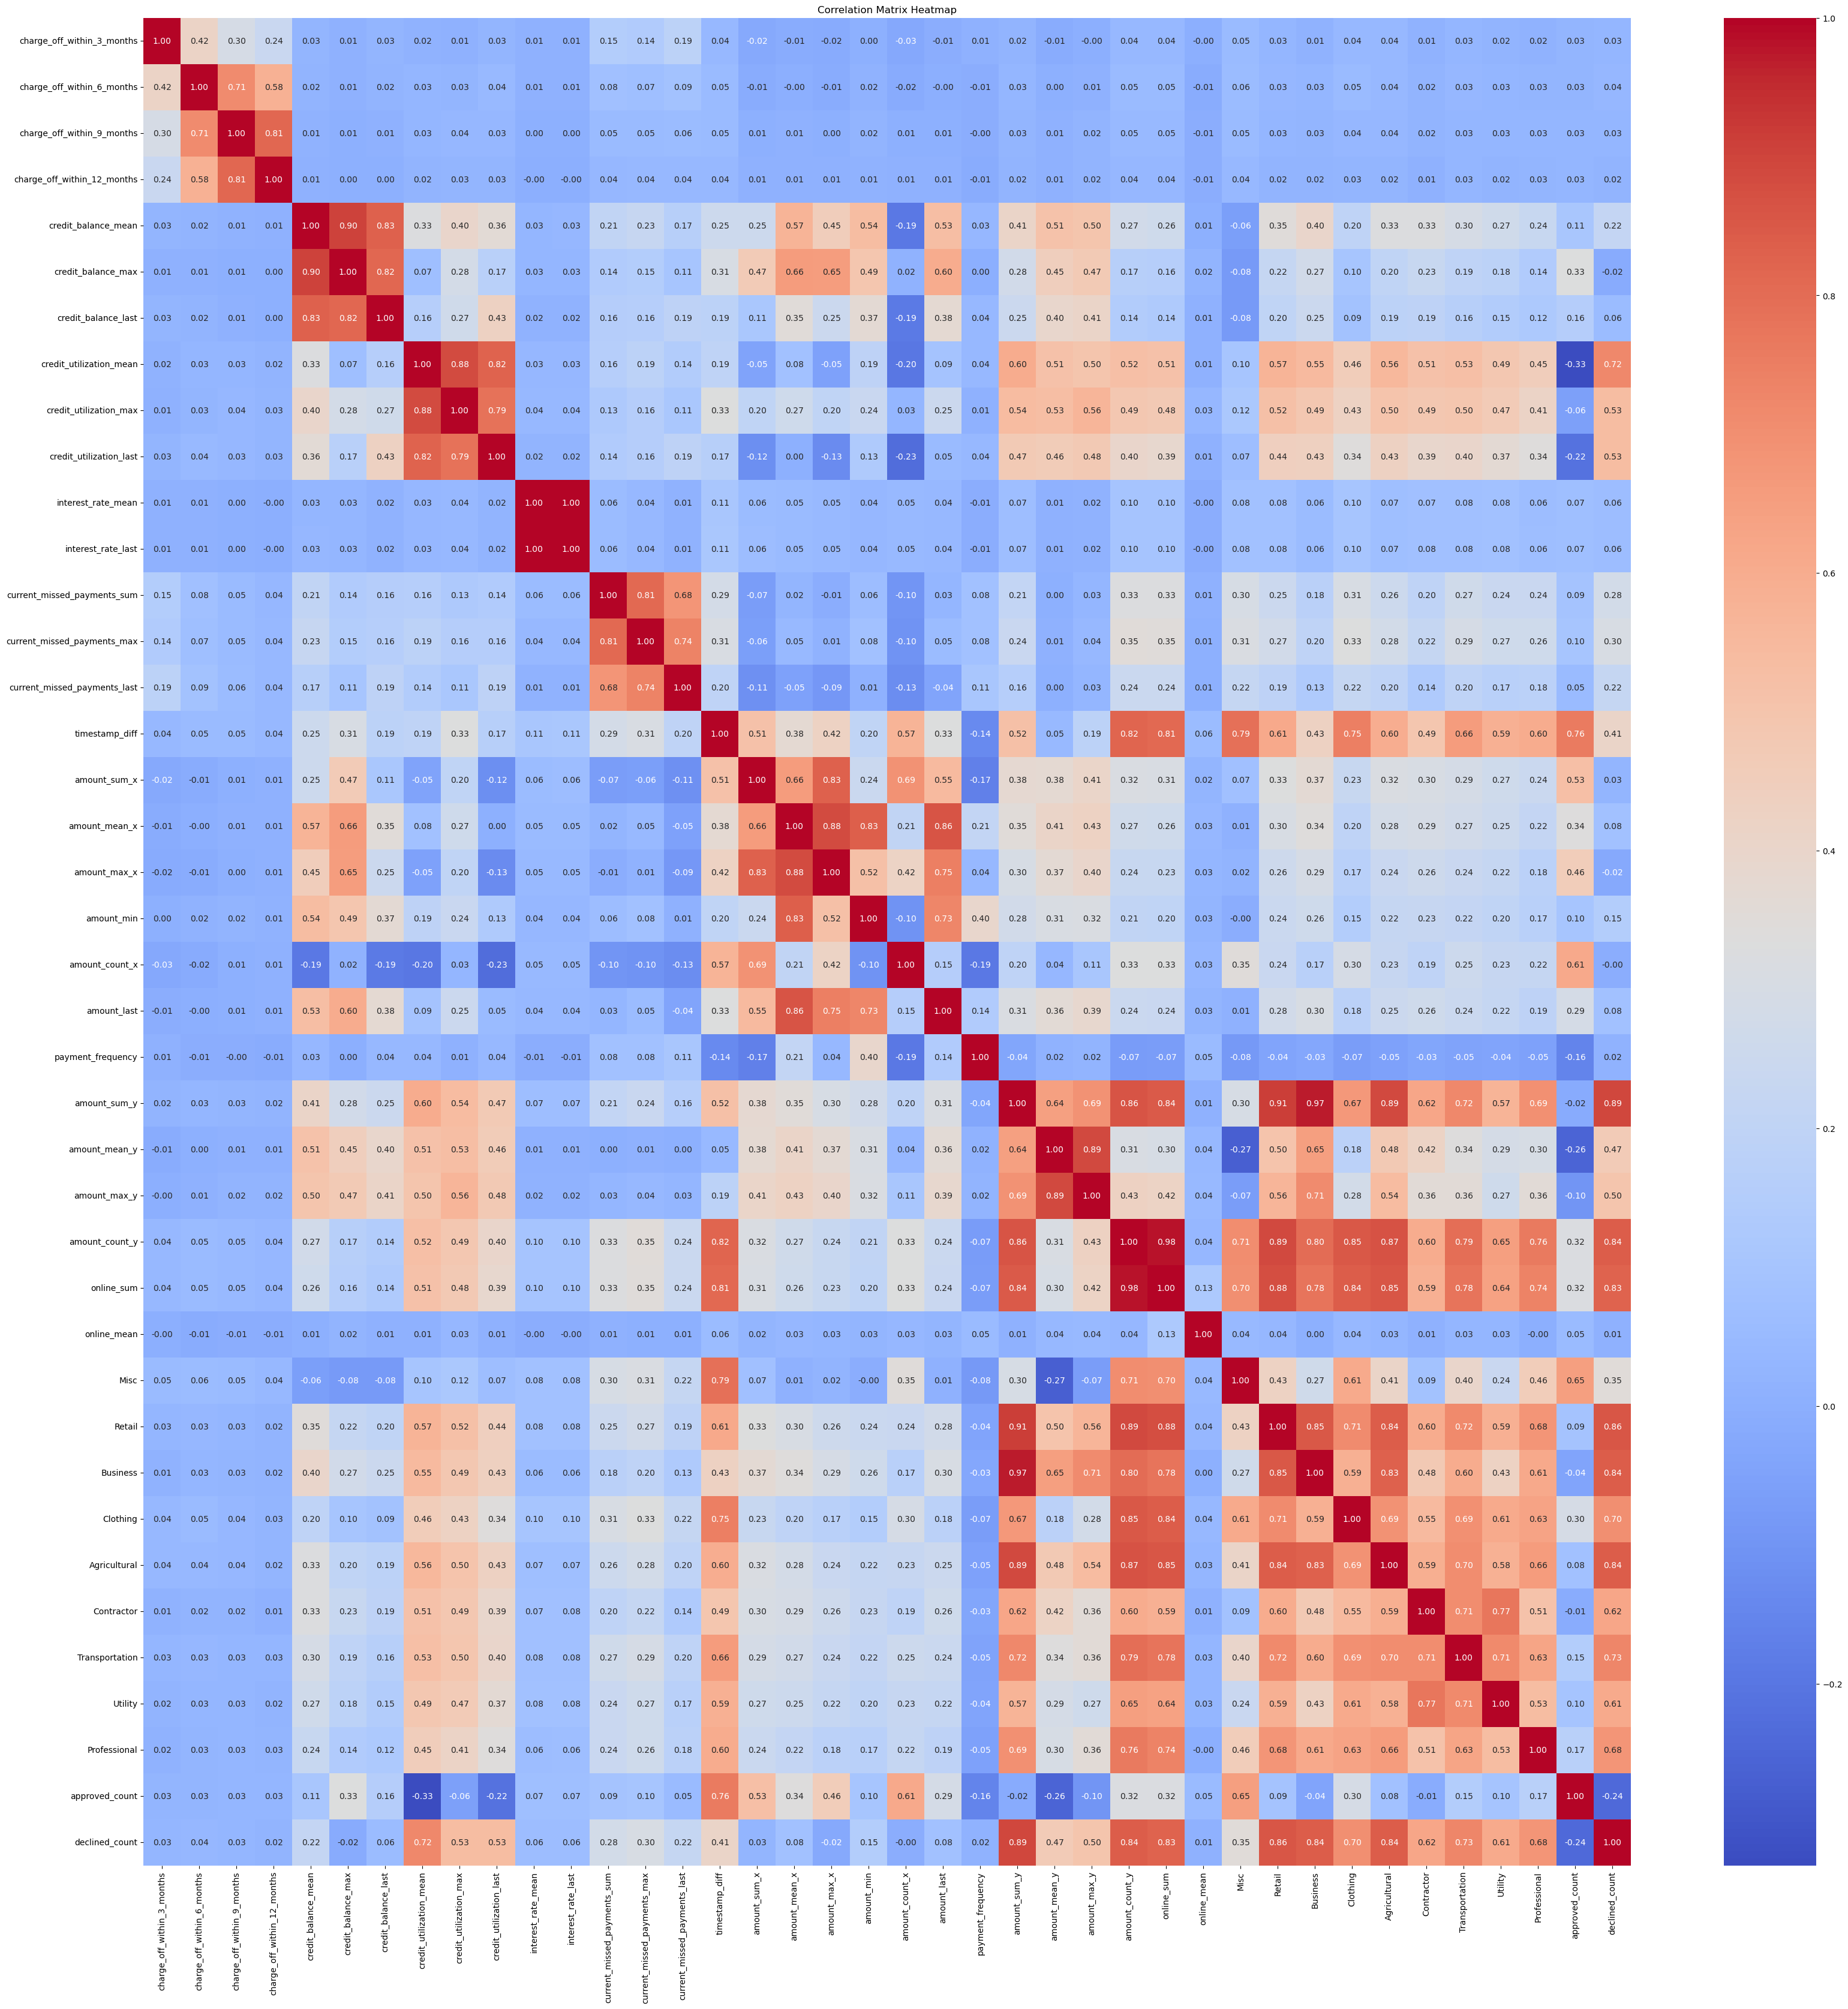

In [141]:
correlation_matrix = merged_final.drop(columns=['agent_id']).corr()

# print("Correlation Matrix:")
# print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 40))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [142]:
merged_final.to_csv('merged_final.csv', index=False)

In [147]:
!pip install imbalanced-learn


In [162]:
import time
import psutil
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
import numpy as np

# Load your dataset
data =  merged_final # Replace with your file path

# Define predictors and target
target = 'charge_off_within_3_months'
predictors = [col for col in data.columns if col != target and not col.startswith('charge_off')]
predictors.remove('agent_id') 

X = data[predictors]
y = data[target]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Function to evaluate model performance and resource efficiency
def optimize_model(model, X_train, y_train, X_test, y_test):
    # Start tracking time and memory
    start_time = time.time()
    process = psutil.Process()
    start_memory = process.memory_info().rss / (1024 ** 2)  # Memory usage in MB

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Task-Specific Metrics (F1-Score)
    task_metric_score = f1_score(y_test, y_pred, average='weighted')

    # Resource Efficiency Metrics
    elapsed_time = time.time() - start_time  # Computation time
    memory_used = (process.memory_info().rss / (1024 ** 2)) - start_memory

    # Simulate scalability by doubling the test set size (example for scalability test)
    X_test_scaled = np.vstack([X_test, X_test])
    scalability_test_start_time = time.time()
    _ = model.predict(X_test_scaled)  # Run predictions on the scaled test set
    scalability_elapsed_time = time.time() - scalability_test_start_time

    # Combine metrics into a weighted score
    final_score = (0.6 * task_metric_score +
                   0.15 * (1 / elapsed_time) +
                   0.15 * (1 / memory_used) +
                   0.1 * (1 / scalability_elapsed_time))

    return {
        'task_metric_score': task_metric_score,
        'computation_time': elapsed_time,
        'memory_usage': memory_used,
        'scalability_time': scalability_elapsed_time,
        'final_score': final_score,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Define and optimize the model
model = BalancedRandomForestClassifier(random_state=42)
results = optimize_model(model, X_train_resampled, y_train_resampled, X_test, y_test)

# Display the results
print("=== Classification Report ===")
print(results['classification_report'])

print("\n=== Confusion Matrix ===")
print(results['confusion_matrix'])

print("\n=== Resource Efficiency ===")
print(f"Computation Time: {results['computation_time']:.2f} seconds")
print(f"Memory Usage: {results['memory_usage']:.2f} MB")
print(f"Scalability Test Time: {results['scalability_time']:.2f} seconds")

print("\n=== Final Weighted Score ===")
print(f"Final Score: {results['final_score']:.2f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1469
           1       0.02      1.00      0.04         2

    accuracy                           0.93      1471
   macro avg       0.51      0.96      0.50      1471
weighted avg       1.00      0.93      0.96      1471


=== Confusion Matrix ===
[[1360  109]
 [   0    2]]

=== Resource Efficiency ===
Computation Time: 0.12 seconds
Memory Usage: 2.86 MB
Scalability Test Time: 0.01 seconds

=== Final Weighted Score ===
Final Score: 21.45


/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/opt/anacon

In [164]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define predictors and target
target = 'charge_off_within_3_months'
predictors = [col for col in data.columns if col != target and not col.startswith('charge_off')]
predictors.remove('agent_id') 

X = data[predictors]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train an SVM model
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate the model
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Classification report and confusion matrix
class_report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("=== Classification Report ===")
for label, metrics in class_report.items():
    if isinstance(metrics, dict):  # Avoid printing 'accuracy' as a metric
        print(f"Class {label}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name.capitalize()}: {value:.2f}")
print("\n=== Confusion Matrix ===")
print("True Negatives (0 predicted as 0):", conf_matrix[0, 0])
print("False Positives (0 predicted as 1):", conf_matrix[0, 1])
print("False Negatives (1 predicted as 0):", conf_matrix[1, 0])
print("True Positives (1 predicted as 1):", conf_matrix[1, 1])

from sklearn.metrics import f1_score

# Calculate the final weighted F1 score for the SVM model
final_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Final Weighted F1 Score: {final_f1_score:.2f}")



=== Classification Report ===
Class 0:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 1469.00
Class 1:
  Precision: 0.00
  Recall: 0.00
  F1-score: 0.00
  Support: 2.00
Class macro avg:
  Precision: 0.50
  Recall: 0.50
  F1-score: 0.50
  Support: 1471.00
Class weighted avg:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 1471.00

=== Confusion Matrix ===
True Negatives (0 predicted as 0): 1465
False Positives (0 predicted as 1): 4
False Negatives (1 predicted as 0): 2
True Positives (1 predicted as 1): 0
Final Weighted F1 Score: 1.00


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:26:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:26:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:26:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:26:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

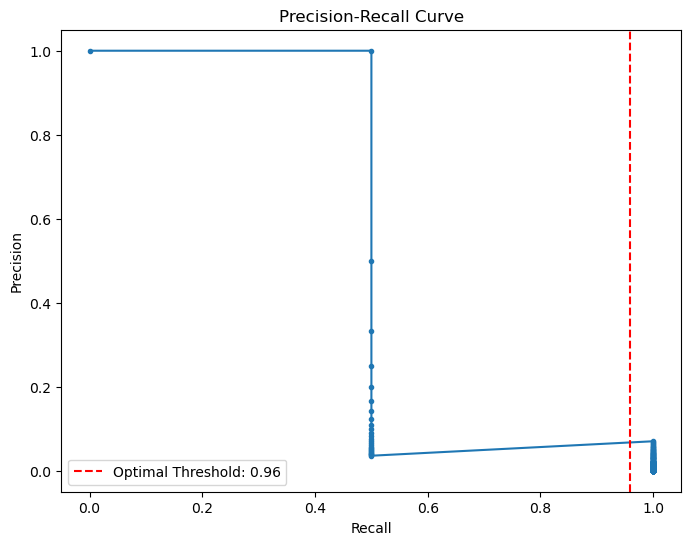

                         Feature  Importance
10  current_missed_payments_last    0.886709
1             credit_balance_max    0.024567
6             interest_rate_mean    0.015052
32                       Utility    0.012102
3        credit_utilization_mean    0.009357
2            credit_balance_last    0.006870
25                          Misc    0.005139
16                amount_count_x    0.004684
33                  Professional    0.004392
29                  Agricultural    0.003819
26                        Retail    0.003142
5        credit_utilization_last    0.002587
27                      Business    0.002427
30                    Contractor    0.002400
34                approved_count    0.002184
4         credit_utilization_max    0.002073
18             payment_frequency    0.001533
8    current_missed_payments_sum    0.001432
11                timestamp_diff    0.001094
28                      Clothing    0.001066
15                    amount_min    0.001019
13        

In [165]:
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data =  merged_final # Replace with your file path

# Define predictors and target
target = 'charge_off_within_3_months'
predictors = [col for col in data.columns if col != target and not col.startswith('charge_off')]
predictors.remove('agent_id') 

X = data[predictors]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 1: Hyperparameter Tuning with GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [len(y_train_resampled) / sum(y_train_resampled == 1)]
}

grid_search = GridSearchCV(xgb, param_grid, scoring='f1_weighted', cv=3, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

# Step 2: Threshold Tuning
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold with the best F1-Score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Predictions with the optimized threshold
y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluation
class_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Step 3: Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()
plt.show()

# Display results
print(feature_importance_df)
print("=== Optimized Classification Report ===")
for label, metrics in class_report_optimized.items():
    if isinstance(metrics, dict):
        print(f"Class {label}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name.capitalize()}: {value:.2f}")

print("\n=== Optimized Confusion Matrix ===")
print("True Negatives (0 predicted as 0):", conf_matrix_optimized[0, 0])
print("False Positives (0 predicted as 1):", conf_matrix_optimized[0, 1])
print("False Negatives (1 predicted as 0):", conf_matrix_optimized[1, 0])
print("True Positives (1 predicted as 1):", conf_matrix_optimized[1, 1])


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:44:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

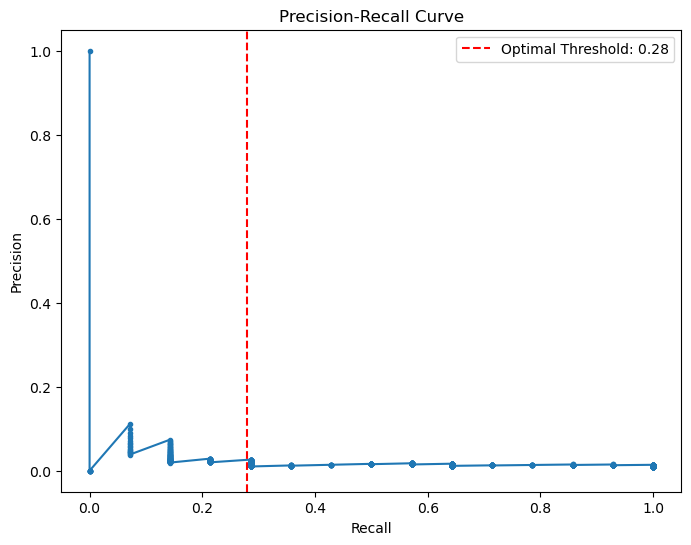

                         Feature  Importance
32                       Utility    0.110127
10  current_missed_payments_last    0.092616
33                  Professional    0.074936
1             credit_balance_max    0.052556
5        credit_utilization_last    0.041539
28                      Clothing    0.036645
20                 amount_mean_y    0.036028
18             payment_frequency    0.035128
27                      Business    0.034070
14                  amount_max_x    0.029779
8    current_missed_payments_sum    0.029123
16                amount_count_x    0.028695
15                    amount_min    0.025544
19                  amount_sum_y    0.025208
35                declined_count    0.025128
31                Transportation    0.024647
24                   online_mean    0.022825
6             interest_rate_mean    0.022757
26                        Retail    0.021963
34                approved_count    0.021672
2            credit_balance_last    0.020647
30        

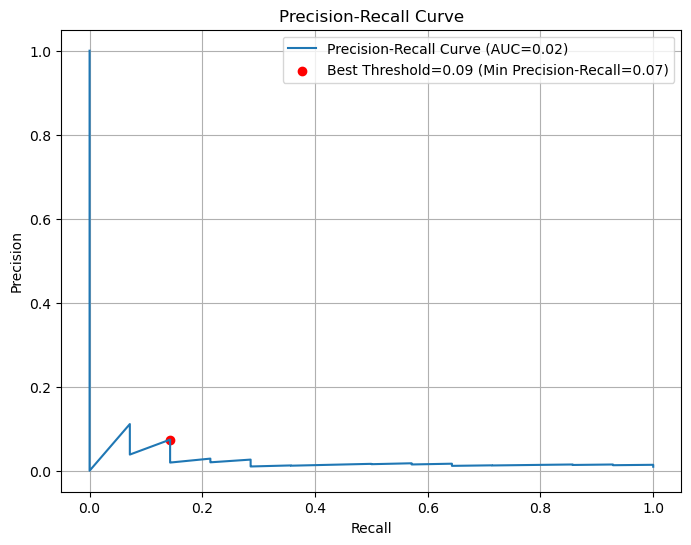

                         Feature  Importance
32                       Utility    0.110127
10  current_missed_payments_last    0.092616
33                  Professional    0.074936
1             credit_balance_max    0.052556
5        credit_utilization_last    0.041539
28                      Clothing    0.036645
20                 amount_mean_y    0.036028
18             payment_frequency    0.035128
27                      Business    0.034070
14                  amount_max_x    0.029779
8    current_missed_payments_sum    0.029123
16                amount_count_x    0.028695
15                    amount_min    0.025544
19                  amount_sum_y    0.025208
35                declined_count    0.025128
31                Transportation    0.024647
24                   online_mean    0.022825
6             interest_rate_mean    0.022757
26                        Retail    0.021963
34                approved_count    0.021672
2            credit_balance_last    0.020647
30        

In [174]:
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data =  merged_final # Replace with your file path

# Define predictors and target
target = 'charge_off_within_6_months'
predictors = [col for col in data.columns if col != target and not col.startswith('charge_off')]
predictors.remove('agent_id') 

X = data[predictors]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 1: Hyperparameter Tuning with GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [len(y_train_resampled) / sum(y_train_resampled == 1)]
}

grid_search = GridSearchCV(xgb, param_grid, scoring='f1_weighted', cv=3, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

# Step 2: Threshold Tuning
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the threshold with the best F1-Score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Predictions with the optimized threshold
y_pred_optimized = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluation
class_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Step 3: Feature Importance
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()
plt.show()

# Display results
print(feature_importance_df)
print("=== Optimized Classification Report ===")
for label, metrics in class_report_optimized.items():
    if isinstance(metrics, dict):
        print(f"Class {label}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name.capitalize()}: {value:.2f}")

print("\n=== Optimized Confusion Matrix ===")
print("True Negatives (0 predicted as 0):", conf_matrix_optimized[0, 0])
print("False Positives (0 predicted as 1):", conf_matrix_optimized[0, 1])
print("False Negatives (1 predicted as 0):", conf_matrix_optimized[1, 0])
print("True Positives (1 predicted as 1):", conf_matrix_optimized[1, 1])

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities with the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the minimum of precision and recall for each threshold
min_precision_recall = np.minimum(precision, recall)

# Find the threshold that maximizes the minimum of precision and recall
best_threshold_index = min_precision_recall.argmax()
best_threshold = thresholds[best_threshold_index]

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC={auc(recall, precision):.2f})')
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', 
            label=f'Best Threshold={best_threshold:.2f} (Min Precision-Recall={min_precision_recall[best_threshold_index]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Predict with the optimized threshold
y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

optimized_class_report = classification_report(y_test, y_pred_optimized, output_dict=True)
optimized_conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Display results
print(feature_importance_df)
print("=== Optimized Classification Report ===")
for label, metrics in class_report_optimized.items():
    if isinstance(metrics, dict):
        print(f"Class {label}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name.capitalize()}: {value:.2f}")

print("\n=== Optimized Confusion Matrix ===")
print("True Negatives (0 predicted as 0):", conf_matrix_optimized[0, 0])
print("False Positives (0 predicted as 1):", conf_matrix_optimized[0, 1])
print("False Negatives (1 predicted as 0):", conf_matrix_optimized[1, 0])
print("True Positives (1 predicted as 1):", conf_matrix_optimized[1, 1])
